In [2]:
#Handling Missing Values
import pandas as pd
import numpy as np
df= pd.read_csv("/content/Loan.csv")
df.sample(5)

,ApplicationDate,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,MaritalStatus,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
16712,2063-10-04,43,85474,465,Employed,Bachelor,21,24703,24,Married,...,7122.833333,0.697653,4,8898,0.267203,0.274700,1349.248326,0.232527,1,42.4
15697,2060-12-23,29,97877,555,Employed,Associate,6,20617,120,Single,...,8156.416667,0.816180,6,87934,0.298117,0.271531,500.667411,0.138010,0,51.0
8307,2040-09-29,62,95615,625,Employed,Bachelor,40,14554,24,Married,...,7967.916667,0.785153,5,6146,0.177054,0.178812,725.760244,0.144048,1,43.2
277,2018-10-05,32,16274,597,Employed,Master,11,15725,36,Widowed,...,1356.166667,0.566069,3,298417,0.202225,0.202756,586.608073,0.803447,0,57.0
4223,2029-07-25,54,20128,603,Unemployed,High School,30,39882,36,Single,...,1677.333333,0.632015,5,75050,0.223382,0.251452,1588.766297,1.100417,0,52.0


In [3]:
df.isnull().sum()

,0
ApplicationDate,0
Age,0
AnnualIncome,0
CreditScore,0
EmploymentStatus,0
EducationLevel,0
Experience,0
LoanAmount,0
LoanDuration,0
MaritalStatus,0


In [4]:
num_features = df.select_dtypes(include=['int64', 'float64']).columns
cat_features = df.select_dtypes(include=['object']).columns

print("Numerical features:", len(num_features))
print("Categorical features:", len(cat_features))

Numerical features: 30
Categorical features: 6


Numerical Features :
Mean imputation is chosen when the numerical data is evenly distributed because it preserves the overall average of the feature. Median imputation is preferred when the data is skewed or contains outliers, as the median is not affected by extreme values and provides a more reliable central value.

Categorical Features:
Mode imputation is used for categorical variables because they represent distinct categories rather than numerical magnitudes. Replacing missing values with the most frequent category maintains the original distribution of the data.

In [5]:
df.describe()

,Age,AnnualIncome,CreditScore,Experience,LoanAmount,LoanDuration,NumberOfDependents,MonthlyDebtPayments,CreditCardUtilizationRate,NumberOfOpenCreditLines,...,MonthlyIncome,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,LoanApproved,RiskScore
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,39.752600,59161.473550,571.612400,17.522750,24882.867800,54.057000,1.517300,454.292700,0.286381,3.023350,...,4891.715521,0.799918,5.002650,7.229432e+04,0.239124,0.239110,911.607052,0.402182,0.239000,50.766780
std,11.622713,40350.845168,50.997358,11.316836,13427.421217,24.664857,1.386325,240.507609,0.159793,1.736161,...,3296.771598,0.120665,2.236804,1.179200e+05,0.035509,0.042205,674.583473,0.338924,0.426483,7.778262
min,18.000000,15000.000000,343.000000,0.000000,3674.000000,12.000000,0.000000,50.000000,0.000974,0.000000,...,1250.000000,0.259203,0.000000,1.000000e+03,0.130101,0.113310,97.030193,0.016043,0.000000,28.800000
25%,32.000000,31679.000000,540.000000,9.000000,15575.000000,36.000000,0.000000,286.000000,0.160794,2.000000,...,2629.583333,0.727379,3.000000,8.734750e+03,0.213889,0.209142,493.763700,0.179693,0.000000,46.000000
50%,40.000000,48566.000000,578.000000,17.000000,21914.500000,48.000000,1.000000,402.000000,0.266673,3.000000,...,4034.750000,0.820962,5.000000,3.285550e+04,0.236157,0.235390,728.511452,0.302711,0.000000,52.000000
75%,48.000000,74391.000000,609.000000,25.000000,30835.000000,72.000000,2.000000,564.000000,0.390634,4.000000,...,6163.000000,0.892333,6.000000,8.882550e+04,0.261533,0.265532,1112.770759,0.509214,0.000000,56.000000
max,80.000000,485341.000000,712.000000,61.000000,184732.000000,120.000000,5.000000,2919.000000,0.917380,13.000000,...,25000.000000,0.999433,16.000000,2.603208e+06,0.405029,0.446787,10892.629520,4.647657,1.000000,84.000000


In [6]:
#Noise Detection and Handling
mu = 15
sigma = 10
noise = np.random.normal(mu,sigma,df['CreditScore'].shape)
df['noiseCreditScore']= df['CreditScore']+ noise
print(df[['CreditScore', 'noiseCreditScore']])


       CreditScore  noiseCreditScore
0              617        612.334771
1              628        642.666308
2              570        577.004007
3              545        551.382719
4              594        604.882024
...            ...               ...
19995          587        615.760238
19996          567        585.686836
19997          645        650.170524
19998          560        568.413514
19999          574        586.187988

[20000 rows x 2 columns]


In [7]:
from scipy.ndimage import uniform_filter1d
import matplotlib.pyplot as plt
window_size = 30
smoothed_avg = uniform_filter1d(df['noiseCreditScore'],size= window_size)

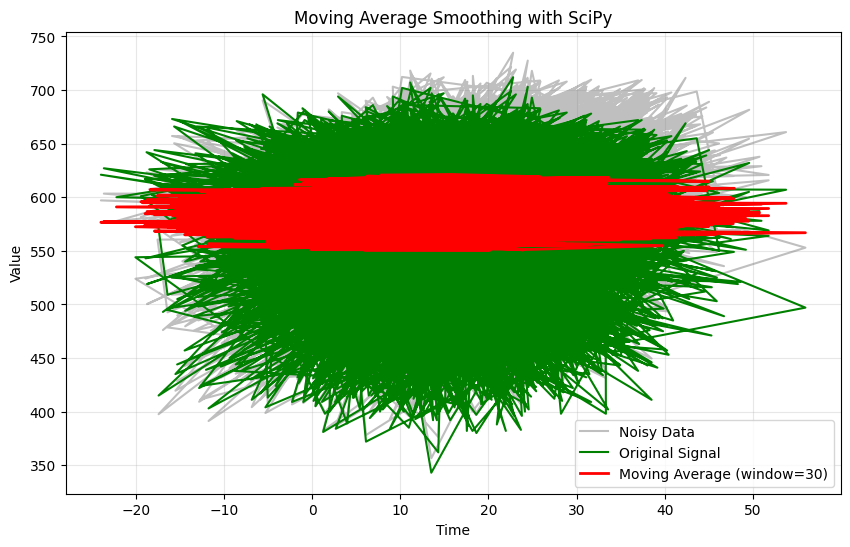

In [8]:
plt.figure(figsize=(10, 6))
plt.plot(noise, df['noiseCreditScore'], 'gray', alpha=0.5, label='Noisy Data')
plt.plot(noise, df['CreditScore'], 'g', label='Original Signal')
plt.plot(noise, smoothed_avg, 'r', linewidth=2, label=f'Moving Average (window={window_size})')
plt.legend()
plt.title('Moving Average Smoothing with SciPy')
plt.xlabel('Time')
plt.ylabel('Value')
plt.grid(True, alpha=0.3)
plt.show()

The noisy feature shows random ups and downs compared to the original credit score. After applying the moving average, these fluctuations are reduced, making the data smoother and more reliable for analysis and modeling. Noise handling improves data quality by reducing random variations without significantly altering the underlying pattern of the numerical feature.

In [9]:
#Outlier Detection and Handling
import pandas as pd
import numpy as np
from scipy import stats

credit_score = df["CreditScore"]

z_scores = np.abs(stats.zscore(credit_score))

outliers = df[z_scores > 3]

print("Number of outliers:", outliers.shape[0])


Number of outliers: 112


In [10]:
# Remove outliers
df_clean = df[z_scores <= 3]

print("Original dataset size:", df.shape)
print("Cleaned dataset size:", df_clean.shape)


Original dataset size: (20000, 37)
Cleaned dataset size: (19888, 37)


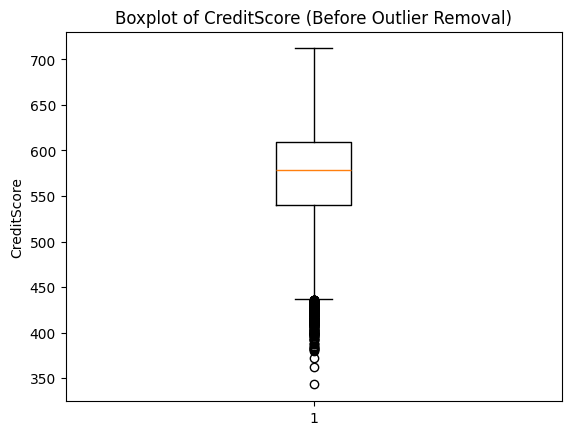

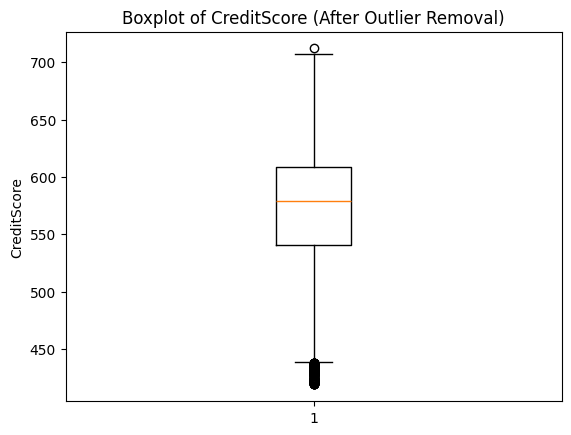

In [11]:
import matplotlib.pyplot as plt

plt.boxplot(df["CreditScore"])
plt.title("Boxplot of CreditScore (Before Outlier Removal)")
plt.ylabel("CreditScore")
plt.show()

plt.boxplot(df_clean["CreditScore"])
plt.title("Boxplot of CreditScore (After Outlier Removal)")
plt.ylabel("CreditScore")
plt.show()


Outliers were detected using the Z-score method because it effectively identifies extreme values based on standard deviation. These outliers were removed to prevent them from disproportionately influencing model training and statistical analysis.

In [14]:
#Data Transformation
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

df_encoded = pd.get_dummies(df, columns=["EducationLevel"], drop_first=True)

print(df_encoded.head())
print("New columns added:", [c for c in df_encoded.columns if "EducationLevel_" in c])



  ApplicationDate  Age  AnnualIncome  CreditScore EmploymentStatus  \
0      2018-01-01   45         39948          617         Employed   
1      2018-01-02   38         39709          628         Employed   
2      2018-01-03   47         40724          570         Employed   
3      2018-01-04   58         69084          545         Employed   
4      2018-01-05   37        103264          594         Employed   

   Experience  LoanAmount  LoanDuration MaritalStatus  NumberOfDependents  \
0          22       13152            48       Married                   2   
1          15       26045            48        Single                   1   
2          26       17627            36       Married                   2   
3          34       37898            96        Single                   1   
4          17        9184            36       Married                   1   

   ... InterestRate  MonthlyLoanPayment  TotalDebtToIncomeRatio  LoanApproved  \
0  ...     0.227590          419.80

One-hot encoding converts categories into numeric columns (0/1) so the model can use them without assuming a wrong order between categories.

In [16]:
#Feature Scaling
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

num_features = ["CreditScore","LoanAmount"]

standard_scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_features] = standard_scaler.fit_transform(df[num_features])

minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_features] = minmax_scaler.fit_transform(df[num_features])

print("Z-score Standardization:")
print(df_standardized[num_features].head())

print("\nMin–Max Normalization:")
print(df_normalized[num_features].head())


Z-score Standardization:
   CreditScore  LoanAmount
0     0.890021   -0.873672
1     1.105724    0.086551
2    -0.031618   -0.540390
3    -0.521852    0.969319
4     0.439006   -1.169194

Min–Max Normalization:
   CreditScore  LoanAmount
0     0.742547    0.052348
1     0.772358    0.123557
2     0.615176    0.077064
3     0.547425    0.189022
4     0.680217    0.030432
